<a href="https://colab.research.google.com/github/wardla2/Data-Science-Portfolio/blob/main/Project_6/25_1113_LWard_Project_6_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Image Classification with Deep Learning

## Problem Definition


This project is a supervised learning problem that uses a deep learning convolutional neural network (CNN) rather than classical ML. It makes a CNN to classify grayscale images as dog or cat using labeled image data. The goal is to train a model that takes an image as input and outputs the probability that the image is a dog.

## Data Collection/Sources


The following data is provided as pickled arrays (X.pickle, y.pickle):

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle

https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [2]:
# URL vars
images_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
target_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"


In [3]:
# Image array and labeled data
X = pd.read_pickle(images_url)
y = pd.read_pickle(target_url)


In [4]:
# Data types
type(X), type(y)


(numpy.ndarray, list)

In [5]:
# Convert y to array
y = np.array(y)
type(y)


numpy.ndarray

## Data Cleaning


In [6]:
# Inspect raw data ranges
X.min(), X.max(), X.dtype


(np.uint8(0), np.uint8(255), dtype('uint8'))

In [7]:
# Scale data to [0,1] and divide pixel values by 255
X = X.astype("float32") / 255.0


In [8]:
# Make sure shape is 4D
print(X.shape)


(24946, 100, 100, 1)


In [9]:
# Check data lables
print(np.unique(y, return_counts=True))


(array([0, 1]), array([12470, 12476]))


## Exploratory Data Analysis


In [10]:
# Check data shapes
print("X shape:", X.shape)  # should be (n, h, w, c)
print("y shape:", y.shape)  # (n,)


X shape: (24946, 100, 100, 1)
y shape: (24946,)


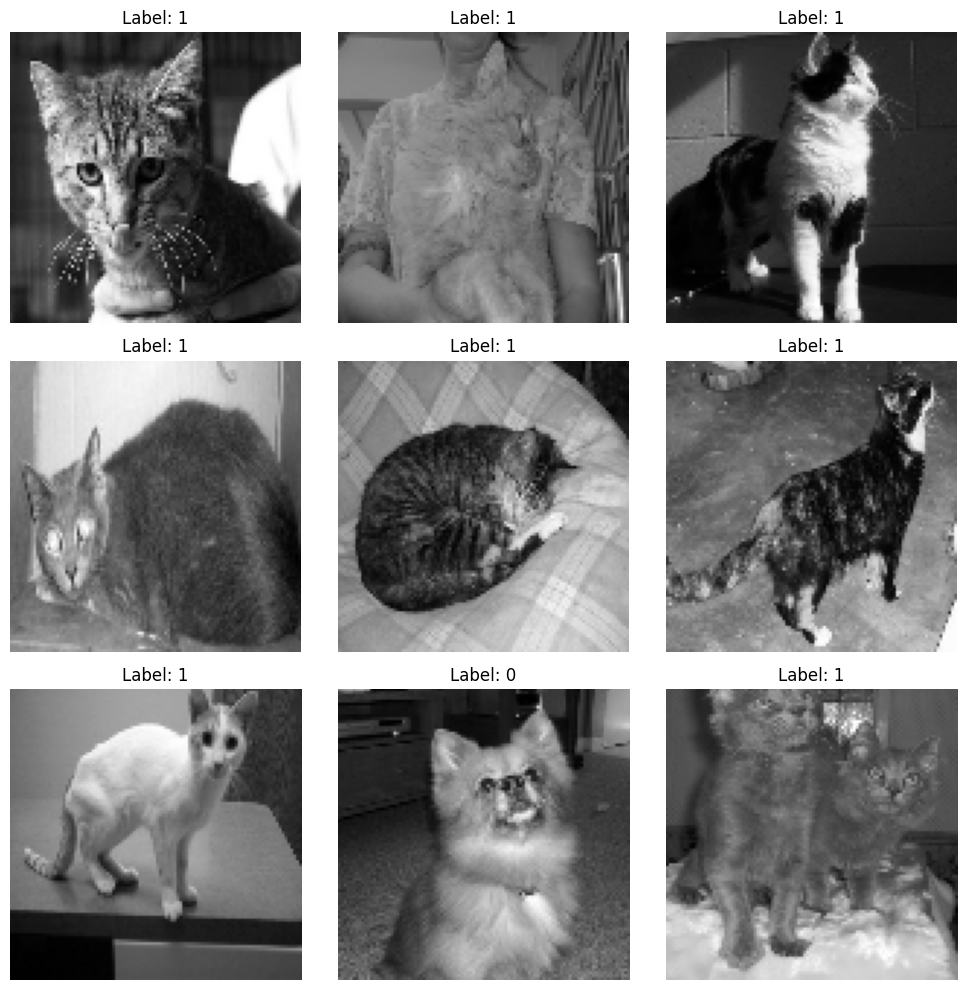

In [11]:
# Plot images with labels
num_examples = 9
idxs = np.random.choice(len(X), size=num_examples, replace=False)

plt.figure(figsize=(10,10))
for i, idx in enumerate(idxs):
    plt.subplot(3,3,i+1)
    plt.imshow(X[idx].squeeze(), cmap="gray")
    plt.title(f"Label: {y[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


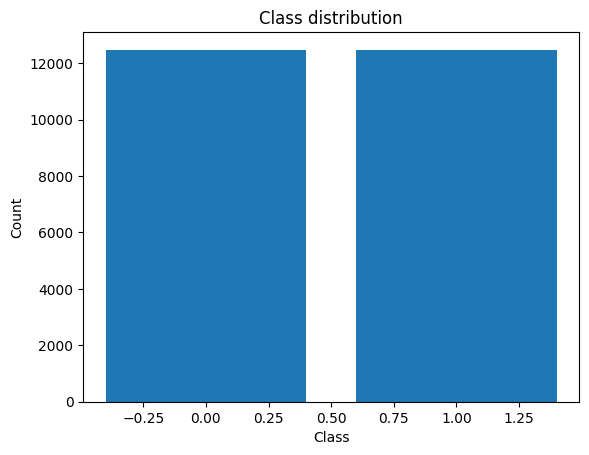

In [12]:
# Plot classes
classes, counts = np.unique(y, return_counts=True)
plt.bar(classes, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution")
plt.show()


## Data Processing / Modeling



In [13]:
# Make a smaller dataset as subset for faster iteration
sample_idx = np.random.choice(len(X), size=5000, replace=False)
X_small = X[sample_idx]
y_small = y[sample_idx]


In [14]:
# Train-test split on subset
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small,
    test_size=0.2,
    random_state=42,
    stratify=y_small
)


In [15]:
# Define CNN
model = Sequential()

model.add(Input(shape=X_train.shape[1:], name="input"))

# Conv + Pool block 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv1'))
model.add(MaxPooling2D(pool_size=(2,2), name='pool1'))

# Conv + Pool block 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2,2), name='pool2'))

# Flatten + Dense
model.add(Flatten())
model.add(Dense(64, activation='relu', name='dense1'))

# Output for binary classification
model.add(Dense(1, activation='sigmoid', name='output'))


In [16]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,185,729 (8.34 MB)

 Trainable params: 2,185,729 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.4923 - loss: 0.8886 - val_accuracy: 0.5500 - val_loss: 0.6875
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5606 - loss: 0.6820 - val_accuracy: 0.5650 - val_loss: 0.6958
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5845 - loss: 0.6632 - val_accuracy: 0.6100 - val_loss: 0.6592
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6510 - loss: 0.6230 - val_accuracy: 0.6475 - val_loss: 0.6354
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7024 - loss: 0.5621 - val_accuracy: 0.6862 - val_loss: 0.5812
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7692 - loss: 0.4867 - val_accuracy: 0.6825 - val_loss: 0.6094
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8059 - loss: 0.4325 - val_accuracy: 0.7000 - val_loss: 0.5853
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8330 - loss: 0.3778 - val_accuracy: 0.6725 - v

In [18]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 0.6726498603820801
Test accuracy: 0.7070000171661377


In [19]:
# Train-test split on full dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
# Train model on full dataset
history_2 = model.fit(
    X_train_full, y_train_full,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7485 - loss: 0.5369 - val_accuracy: 0.7828 - val_loss: 0.4701
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8025 - loss: 0.4290 - val_accuracy: 0.7833 - val_loss: 0.4626
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8334 - loss: 0.3761 - val_accuracy: 0.7871 - val_loss: 0.4721
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8611 - loss: 0.3206 - val_accuracy: 0.7891 - val_loss: 0.4753
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8976 - loss: 0.2547 - val_accuracy: 0.7926 - val_loss: 0.4883
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9284 - loss: 0.1897 - val_accuracy: 0.7816 - val_loss: 0.5673
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9552 - loss: 0.1312 - val_accuracy: 0.7928 - val_loss: 0.6549
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9727 - loss: 0.0904 - val_accu

In [21]:
# Evaluate model trained on full dataset on test set
test_loss_2, test_acc_2 = model.evaluate(X_test_full, y_test_full, verbose=0)
print("Test loss:", test_loss_2)
print("Test accuracy:", test_acc_2)


Test loss: 0.9257005453109741
Test accuracy: 0.7681362628936768


In [22]:
# Plot distribution of probablilites for the testing set
y_proba = model.predict(X_test_full).ravel()  # flatten from (n,1) to (n,)


156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


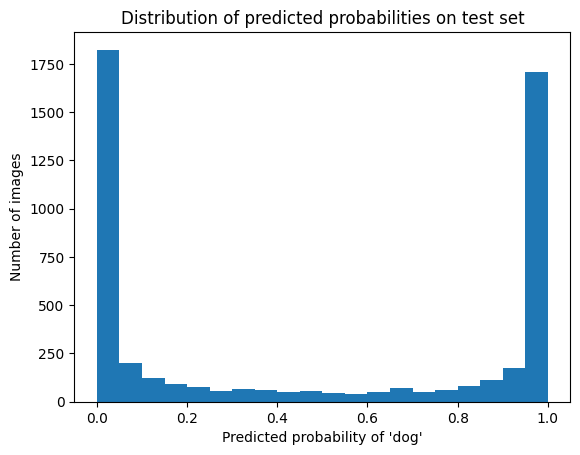

In [23]:
# Histogram of predicted probabilities
plt.hist(y_proba, bins=20)
plt.xlabel("Predicted probability of 'dog'")
plt.ylabel("Number of images")
plt.title("Distribution of predicted probabilities on test set")
plt.show()


Number of misclassified images: 1157


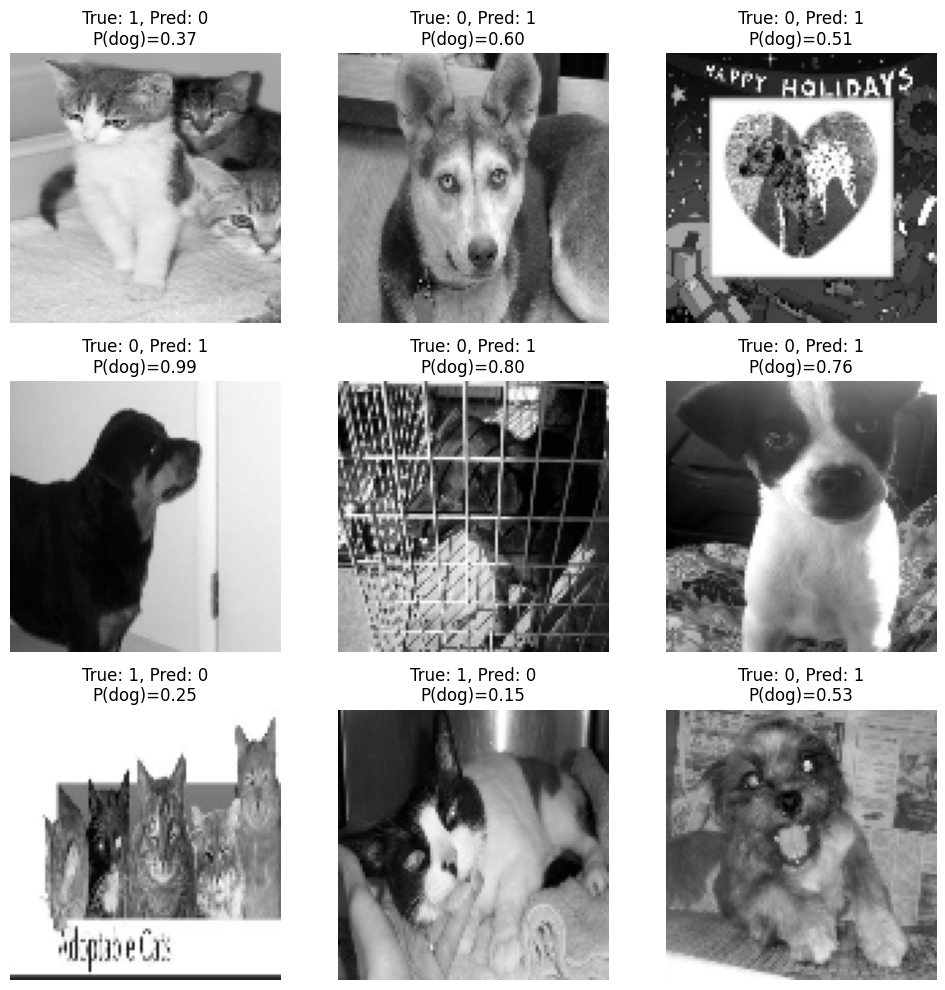

In [24]:
# Show misclassified images

# Create probability labels (0/1)
y_pred = (y_proba >= 0.5).astype(int)

# Find misclassified indices
mis_idx = np.where(y_pred != y_test_full)[0]
print(f"Number of misclassified images: {len(mis_idx)}")

# Plot some misclassified images with their predicted probability
n_to_show = min(9, len(mis_idx))

plt.figure(figsize=(10, 10))
for i, idx in enumerate(mis_idx[:n_to_show]):
  plt.subplot(3, 3, i + 1)

# squeeze to remove channel dimension (h, w, 1)
  img = X_test_full[idx].squeeze()
  plt.imshow(img, cmap="gray")

  true_label = y_test_full[idx]
  pred_label = y_pred[idx]
  prob_dog = y_proba[idx]

  plt.title(f"True: {true_label}, Pred: {pred_label}\nP(dog)={prob_dog:.2f}")
  plt.axis("off")

plt.tight_layout()
plt.show()


## Predict whether a novel image is a dog

In [25]:
# Import dog image
!curl -O "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 60603  100 60603    0     0   256k      0 --:--:-- --:--:-- --:--:--  257k


In [26]:
! ls -la

total 76
drwxr-xr-x 1 root root  4096 Nov 17 05:51 .
drwxr-xr-x 1 root root  4096 Nov 17 05:49 ..
drwxr-xr-x 4 root root  4096 Nov 12 14:30 .config
-rw-r--r-- 1 root root 60603 Nov 17 05:51 dog.jpg
drwxr-xr-x 1 root root  4096 Nov 12 14:30 sample_data


Define a function that will read in a new image and convert it to a 4 dimensional array of pixels

In [27]:
import cv2
import requests
from io import BytesIO

def load_image_for_cnn(url, target_size=(100, 100)):
    """
    Download an image from a URL, resize, convert to grayscale,
    scale to [0,1], and reshape for CNN prediction.

    Returns:
        cnn_img  : np.ndarray of shape (1, H, W, 1), ready for model.predict
        gray_img : np.ndarray of shape (H, W), for visualization
    """
    # 1. Download image bytes
    response = requests.get(url)
    img_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)

    # 2. Decode as a color image (BGR) using OpenCV
    img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)  # BGR format

    # 3. Resize to target_size
    resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

    # 4. Convert to grayscale
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)  # shape (H, W)

    # 5. Scale pixel values to [0, 1]
    gray_img = gray_img.astype("float32") / 255.0

    # 6. Add channel and batch dimensions → (1, H, W, 1)
    cnn_img = gray_img[np.newaxis, :, :, np.newaxis]

    return cnn_img, gray_img

Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

CNN input shape: (1, 100, 100, 1)
Gray image shape: (100, 100)


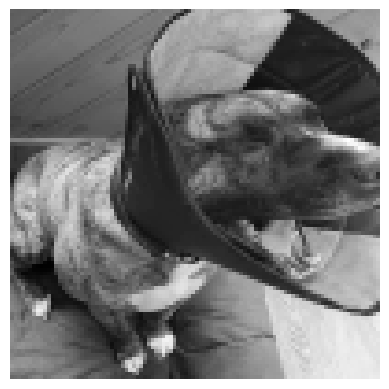

In [28]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"

dog_img, dog_gray = load_image_for_cnn(url, target_size=(100, 100))

print("CNN input shape:", dog_img.shape)      # (1, 100, 100, 1)
print("Gray image shape:", dog_gray.shape)    # (100, 100)

# Visualize the grayscale image
plt.imshow(dog_gray, cmap=plt.cm.gray)
plt.axis("off")
plt.show()


Use the neural network to predict whether the image is a dog or a cat.

In [29]:
# Get model prediction
proba_dog = model.predict(dog_img)[0, 0]
print("Predicted P(dog):", proba_dog)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
Predicted P(dog): 0.06409851


## Data Visualization/Communication of Results


In [30]:
print(len(X), X.shape)
print(np.unique(y, return_counts=True))
print("Test loss:", test_loss_2)
print("Test accuracy:", test_acc_2)

24946 (24946, 100, 100, 1)
(array([0, 1]), array([12470, 12476]))
Test loss: 0.9257005453109741
Test accuracy: 0.7681362628936768


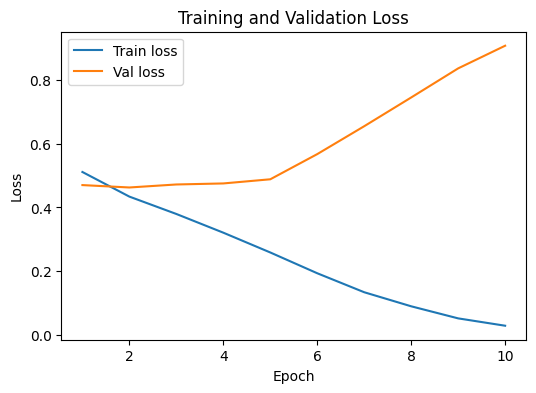

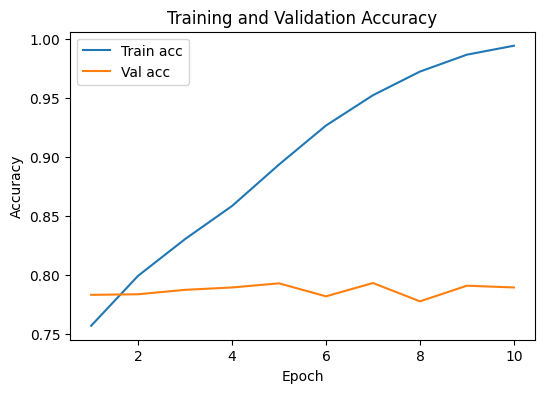

In [31]:
history_dict = history_2.history
epochs = range(1, len(history_dict["loss"]) + 1)

# Loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, history_dict["loss"], label="Train loss")
plt.plot(epochs, history_dict["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

# Accuracy
plt.figure(figsize=(6, 4))
plt.plot(epochs, history_dict["accuracy"], label="Train acc")
plt.plot(epochs, history_dict["val_accuracy"], label="Val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

### BONUS: Upload an image of your dog or cat and use your model to predict whether the image is a dog or cat.

Stepwise:

In [34]:
ollie_img = cv2.imread("Ollie.jpg")

In [35]:
# Resize dog image
target_size = (100, 100)
resized_ollie_img = cv2.resize(ollie_img, target_size, interpolation=cv2.INTER_AREA)


In [36]:
# Convert to grayscale
grayscale_ollie_img = cv2.cvtColor(resized_ollie_img, cv2.COLOR_BGR2GRAY)

grayscale_ollie_img.shape

(100, 100)

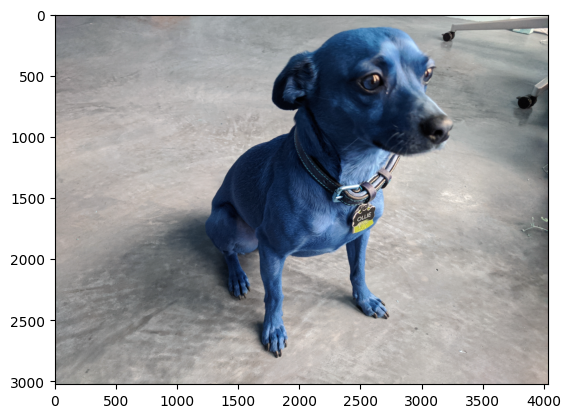

In [37]:
# Reshape image array
ollie_dog_img = grayscale_ollie_img.reshape(1,100,100,1)

plt.imshow(ollie_img)

In [38]:
ollie_dog_img[0,:].shape

(100, 100, 1)

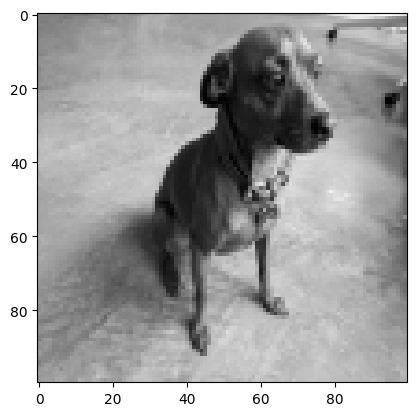

In [39]:
plt.imshow(ollie_dog_img[0,:], cmap=plt.cm.gray)

In [40]:
# Get model prediction
proba_dog = model.predict(ollie_dog_img)[0, 0]
print("Predicted P(dog):", proba_dog)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted P(dog): 0.0


Using the function:

CNN input shape: (1, 100, 100, 1)
Gray image shape: (100, 100)


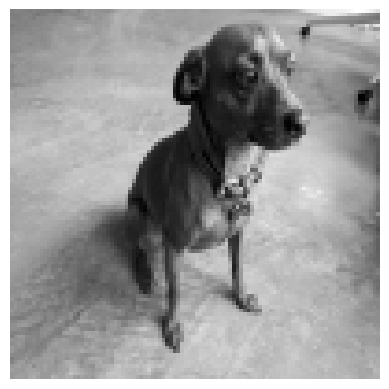

In [41]:
ollie_url = "https://drive.google.com/uc?export=download&id=1VzgjUrJCCV8KC7AUBshQ4i983ZzMcR4k"

dog_img, dog_gray = load_image_for_cnn(ollie_url, target_size=(100, 100))

print("CNN input shape:", dog_img.shape)      # (1, 100, 100, 1)
print("Gray image shape:", dog_gray.shape)    # (100, 100)

# Visualize the grayscale image
plt.imshow(dog_gray, cmap=plt.cm.gray)
plt.axis("off")
plt.show()


In [42]:
# Get model prediction
proba_dog = model.predict(ollie_dog_img)[0, 0]
print("Predicted P(dog):", proba_dog)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted P(dog): 0.0
